In [15]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix,average_precision_score,accuracy_score, make_scorer



sns.set(style="darkgrid")
cust_df = pd.read_csv("Customer_DF.csv")             #reading the csv files
tran_df = pd.read_csv("cust_transaction_details.csv")
print(cust_df)     
cust_df=cust_df.dropna() #dropping null values if present
cust_df #printing to compare dataframe before null values


     Index                        customerEmail         customerPhone  \
0        0               josephhoward@yahoo.com          400-108-5415   
1        1               evansjeffery@yahoo.com        1-788-091-7546   
2        2            andersonwilliam@yahoo.com          024.420.0375   
3        3                rubenjuarez@yahoo.com    670.664.8168x94985   
4        4                     uchen@malone.com        1-981-877-0870   
5        5             robinsoncynthia@dunn.com      +65(5)8997489788   
6        6         samuel15@saunders-rhodes.com            5045239487   
7        7                 johnlowery@gmail.com          044-642-9860   
8        8            jameslandry@rodriguez.com    1-885-168-1310x338   
9        9           ubranch@rivera-parker.info    (772)964-8162x6310   
10      10               bowenwilliam@yahoo.com   (128)248-4091x37789   
11      11                 ksummers@hotmail.com        1-023-275-4692   
12      12       christineklein@wright-boyd.org    

,Index,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True
5,5,robinsoncynthia@dunn.com,+65(5)8997489788,hbww39m1wenbq4ymjhsx,43.166.163.164,"65233 Hutchinson Mountains\nMartinezside, OR 7...",1,1,2,True
6,6,samuel15@saunders-rhodes.com,5045239487,up7afvce5v0omniqlevq,33.67.35.30,"3960 Emily Fort\nStaceytown, AR 21817-3325",2,1,2,True
7,7,johnlowery@gmail.com,044-642-9860,rjb0adai34izqvys4938,212.144.68.190,"484 Pamela Pass\nLake Jessicaview, WI 12942-9074",6,5,2,True
8,8,jameslandry@rodriguez.com,1-885-168-1310x338,yz4l2bgbvzra5eb5qcan,c899:ff67:6864:4365:def3:3023:655f:5181,USNS Price\nFPO AE 14661,5,2,1,False
9,9,ubranch@rivera-parker.info,(772)964-8162x6310,6mpx027neyz6sh04n3ue,86.16.65.228,"6974 Robertson Common Apt. 902\nPort Juanside,...",0,0,1,True


In [6]:
#Import regex module for use here...
import re

#Create a new column dropFlag containing a boolean value whether we have to drop that row or not.
# 1 means the row has to be dropped, 0 means it should not be.

l = list(zip(cust_df['customerEmail'], cust_df['customerPhone'], cust_df['customerIPAddress']))
for x in l:
    print (x[0])
cust_df['dropFlag'] = [1 if (('.' not in x[0]) or (re.search('[a-zA-Z]', x[1])) or (re.search('[a-zA-Z]', x[2]))) else 0 for x in l]
cust_df = cust_df[cust_df['dropFlag'] == 0]
cust_df = cust_df.drop(columns='dropFlag')
cust_df.to_csv('cleanedDF.csv')

josephhoward@yahoo.com
evansjeffery@yahoo.com
andersonwilliam@yahoo.com
rubenjuarez@yahoo.com
uchen@malone.com
robinsoncynthia@dunn.com
samuel15@saunders-rhodes.com
johnlowery@gmail.com
jameslandry@rodriguez.com
ubranch@rivera-parker.info
bowenwilliam@yahoo.com
ksummers@hotmail.com
christineklein@wright-boyd.org
meganwalters@chavez.com
caleb94@sutton.info
gonzalesjackson@gmail.com
dana09@yahoo.com
alec27@bell.com
juliecook@hotmail.com
meganberry@clark.biz
psantiago@nelson.net
harrisnicholas@mitchell-hancock.com
davismike@hotmail.com
guerramichael@hotmail.com
natalie98@yahoo.com
karen54@mullins.biz
avaldez@gmail.com
blackjoel@wright.com
abigail08@yahoo.com
catherine64@gmail.com
romerolauren@hotmail.com
qramsey@hotmail.com
9es7t@u6n7x
ypruitt@hotmail.com
zbennett@frazier.com
aweaver@yahoo.com
richard05@hanson-key.org
paul86@hotmail.com
xwang@white.com
mark02@young.com
johnlowery@gmail.com
smithtiffany@davis-perkins.com
brandon58@conner.com
knichols@gmail.com
gsimpson@cox.org
johnlowery@g

In [16]:
x = cust_df.iloc[:,6:9].values
y = cust_df.iloc[:,9].values

In [17]:
print(x)
print(y)

[[ 2  2  1]
 [ 3  3  7]
 [ 5  3  2]
 [ 3  3  1]
 [ 7  7  6]
 [ 1  1  2]
 [ 2  1  2]
 [ 6  5  2]
 [ 5  2  1]
 [ 0  0  1]
 [ 6  5  1]
 [ 7  5  4]
 [ 4  4  3]
 [ 4  2  1]
 [ 5  5  2]
 [ 4  4  1]
 [ 6  3  2]
 [ 6  4  2]
 [ 2  2  1]
 [ 5  4  2]
 [ 1  1  1]
 [ 6  4  2]
 [ 4  3  1]
 [ 0  0  1]
 [ 1  1  1]
 [ 8  5  2]
 [ 2  1  1]
 [ 6  5  1]
 [ 5  3  2]
 [ 5  4  6]
 [ 2  2  1]
 [ 6  5  2]
 [ 2  1  1]
 [ 4  4  3]
 [ 0  0  0]
 [ 1  1  1]
 [ 1  1  1]
 [ 2  1  1]
 [ 0  0  0]
 [ 5  4  2]
 [ 0  0  1]
 [ 0  0  1]
 [ 8  3  1]
 [ 0  0  1]
 [ 0  0  0]
 [ 3  2  1]
 [ 7  3  2]
 [ 0  0  0]
 [ 7  5  2]
 [ 3  3  1]
 [ 7  6  3]
 [ 0  0  1]
 [ 5  4  3]
 [ 5  2  3]
 [ 0  0  0]
 [ 1  1  1]
 [ 8  5  2]
 [ 1  1  1]
 [ 3  2  1]
 [ 6  4  1]
 [ 4  4  6]
 [ 4  4  2]
 [ 6  5  2]
 [ 7  4  1]
 [ 5  3  2]
 [ 7  5  1]
 [ 1  1  3]
 [ 0  0  1]
 [ 3  3 15]
 [ 6  4  1]
 [ 0  0  0]
 [ 3  3  2]
 [ 7  5  3]
 [ 2  2  1]
 [ 5  4  2]
 [ 5  3  1]
 [ 0  0  1]
 [ 3  3  1]
 [ 7  6  2]
 [ 2  2  1]
 [ 4  4 14]
 [ 5  4  3]
 [ 0  0  2]
 [ 2

In [18]:
def trans_Fraud(i):
    if(i==True):
        return 1
    if(i==False):
        return 0

In [19]:
cust_df['Fraud']=cust_df['Fraud'].apply(trans_Fraud)

In [20]:
print(cust_df)

     Index                        customerEmail         customerPhone  \
0        0               josephhoward@yahoo.com          400-108-5415   
1        1               evansjeffery@yahoo.com        1-788-091-7546   
2        2            andersonwilliam@yahoo.com          024.420.0375   
3        3                rubenjuarez@yahoo.com    670.664.8168x94985   
4        4                     uchen@malone.com        1-981-877-0870   
5        5             robinsoncynthia@dunn.com      +65(5)8997489788   
6        6         samuel15@saunders-rhodes.com            5045239487   
7        7                 johnlowery@gmail.com          044-642-9860   
8        8            jameslandry@rodriguez.com    1-885-168-1310x338   
9        9           ubranch@rivera-parker.info    (772)964-8162x6310   
10      10               bowenwilliam@yahoo.com   (128)248-4091x37789   
11      11                 ksummers@hotmail.com        1-023-275-4692   
12      12       christineklein@wright-boyd.org    

In [21]:
print(cust_df)

     Index                        customerEmail         customerPhone  \
0        0               josephhoward@yahoo.com          400-108-5415   
1        1               evansjeffery@yahoo.com        1-788-091-7546   
2        2            andersonwilliam@yahoo.com          024.420.0375   
3        3                rubenjuarez@yahoo.com    670.664.8168x94985   
4        4                     uchen@malone.com        1-981-877-0870   
5        5             robinsoncynthia@dunn.com      +65(5)8997489788   
6        6         samuel15@saunders-rhodes.com            5045239487   
7        7                 johnlowery@gmail.com          044-642-9860   
8        8            jameslandry@rodriguez.com    1-885-168-1310x338   
9        9           ubranch@rivera-parker.info    (772)964-8162x6310   
10      10               bowenwilliam@yahoo.com   (128)248-4091x37789   
11      11                 ksummers@hotmail.com        1-023-275-4692   
12      12       christineklein@wright-boyd.org    

In [22]:
x = cust_df.iloc[:,6:9].values
y = cust_df.iloc[:,9].values

In [23]:
print(x)

[[ 2  2  1]
 [ 3  3  7]
 [ 5  3  2]
 [ 3  3  1]
 [ 7  7  6]
 [ 1  1  2]
 [ 2  1  2]
 [ 6  5  2]
 [ 5  2  1]
 [ 0  0  1]
 [ 6  5  1]
 [ 7  5  4]
 [ 4  4  3]
 [ 4  2  1]
 [ 5  5  2]
 [ 4  4  1]
 [ 6  3  2]
 [ 6  4  2]
 [ 2  2  1]
 [ 5  4  2]
 [ 1  1  1]
 [ 6  4  2]
 [ 4  3  1]
 [ 0  0  1]
 [ 1  1  1]
 [ 8  5  2]
 [ 2  1  1]
 [ 6  5  1]
 [ 5  3  2]
 [ 5  4  6]
 [ 2  2  1]
 [ 6  5  2]
 [ 2  1  1]
 [ 4  4  3]
 [ 0  0  0]
 [ 1  1  1]
 [ 1  1  1]
 [ 2  1  1]
 [ 0  0  0]
 [ 5  4  2]
 [ 0  0  1]
 [ 0  0  1]
 [ 8  3  1]
 [ 0  0  1]
 [ 0  0  0]
 [ 3  2  1]
 [ 7  3  2]
 [ 0  0  0]
 [ 7  5  2]
 [ 3  3  1]
 [ 7  6  3]
 [ 0  0  1]
 [ 5  4  3]
 [ 5  2  3]
 [ 0  0  0]
 [ 1  1  1]
 [ 8  5  2]
 [ 1  1  1]
 [ 3  2  1]
 [ 6  4  1]
 [ 4  4  6]
 [ 4  4  2]
 [ 6  5  2]
 [ 7  4  1]
 [ 5  3  2]
 [ 7  5  1]
 [ 1  1  3]
 [ 0  0  1]
 [ 3  3 15]
 [ 6  4  1]
 [ 0  0  0]
 [ 3  3  2]
 [ 7  5  3]
 [ 2  2  1]
 [ 5  4  2]
 [ 5  3  1]
 [ 0  0  1]
 [ 3  3  1]
 [ 7  6  2]
 [ 2  2  1]
 [ 4  4 14]
 [ 5  4  3]
 [ 0  0  2]
 [ 2

In [24]:
print(y)

[0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0]


In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.25,random_state=0)
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
def tuning(model, parameters, parameter_name, train_data_x, train_data_y, plot_values,is_xgb=False):
    grid = GridSearchCV(model, parameters, cv = 3, scoring = 'f1_macro')
    grid.fit(train_data_x, train_data_y)
    
    
    results = pd.DataFrame(grid.cv_results_)           #storing results of gridseachcv in a dataframe to access its elements
    params = results['params']                         #storing combination of parameters used by model in params
    score_tr_array = results['mean_train_score']         #storing scores on train data of model
    score_cv_array = results['mean_test_score']          #storing scores on cv data of model
    for i in range(len(params)):
        print("For", params[i]," acc of Train data is", score_tr_array[i],"and acc of CV data is", score_cv_array[i])
    
    
    print('Best Parameter is ',  grid.best_params_)
    print('Best F1 Score is ',  grid.best_score_)
    if not is_xgb:
        plt.xlabel(parameter_name)
        plt.title('Cross Validation')
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_train_score'])
        plt.plot(np.log10(plot_values),grid.cv_results_['mean_test_score'])
        plt.legend(['Train Accuracy', 'CV Accuracy'])
        plt.show()
    
    return grid.best_params_



C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

For {'C': 1e-05}  acc of Train data is 0.4938206540743568 and acc of CV data is 0.5252957011264545
For {'C': 0.0001}  acc of Train data is 0.5000998324123588 and acc of CV data is 0.5252957011264545
For {'C': 0.001}  acc of Train data is 0.5560134318664889 and acc of CV data is 0.5937050882372862
For {'C': 0.01}  acc of Train data is 0.6127947394987113 and acc of CV data is 0.6009877697135162
For {'C': 0.1}  acc of Train data is 0.6242247918115155 and acc of CV data is 0.6356865827537697
For {'C': 1}  acc of Train data is 0.6522876511719579 and acc of CV data is 0.6333682190825048
For {'C': 10}  acc of Train data is 0.6522876511719579 and acc of CV data is 0.650991318299725
For {'C': 100}  acc of Train data is 0.6454348772290447 and acc of CV data is 0.6438393387339523
For {'C': 1000}  acc of Train data is 0.6454348772290447 and acc of CV data is 0.6438393387339523
For {'C': 10000}  acc of Train data is 0.6454348772290447 and acc of CV data is 0.6438393387339523
Best Parameter is  {'C'

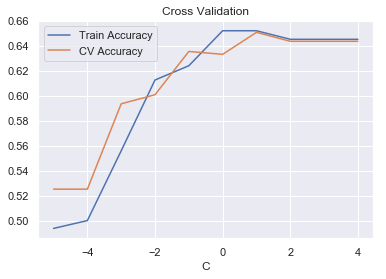

Accuracy of model on testing data is 0.7142857142857143
F1 Score of model on testing data is 0.5757575757575757
Log loss of model on testing data is 0.5183756516640632


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, log_loss, roc_auc_score, classification_report

from collections import Counter, defaultdict
import numpy as np
model = LogisticRegression()
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', x_train, y_train, alpha)

best_alpha = best_params['C']
clf = LogisticRegression(C = best_alpha).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\metrics\classi

For {'C': 1e-05}  acc of Train data is 0.37623920913394593 and acc of CV data is 0.3762289156513685
For {'C': 0.0001}  acc of Train data is 0.37623920913394593 and acc of CV data is 0.3762289156513685
For {'C': 0.001}  acc of Train data is 0.37623920913394593 and acc of CV data is 0.3762289156513685
For {'C': 0.01}  acc of Train data is 0.463702946520284 and acc of CV data is 0.4949123991637575
For {'C': 0.1}  acc of Train data is 0.6288002715526805 and acc of CV data is 0.6275859594407981
For {'C': 1}  acc of Train data is 0.6319612471340016 and acc of CV data is 0.6175091571551385
For {'C': 10}  acc of Train data is 0.6251086431670801 and acc of CV data is 0.6115358099695586
For {'C': 100}  acc of Train data is 0.6312997756141617 and acc of CV data is 0.6056595444434569
For {'C': 1000}  acc of Train data is 0.6251086431670801 and acc of CV data is 0.6056595444434569
For {'C': 10000}  acc of Train data is 0.6251086431670801 and acc of CV data is 0.6185730542716672
Best Parameter is  {

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:

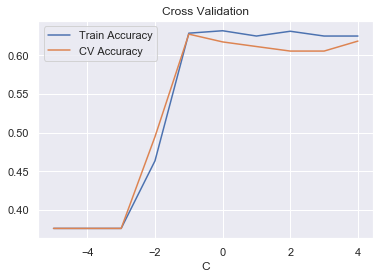

Accuracy of model on testing data is 0.7857142857142857
F1 Score of model on testing data is 0.590465872156013
Log loss of model on testing data is 0.5174245733871109


In [27]:
from sklearn.svm import SVC


model = SVC( kernel='linear')
alpha = [0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
alphas = {'C' : alpha}
best_params = tuning(model, alphas, 'C', x_train, y_train, alpha)

best_alpha = best_params['C']
clf = SVC( kernel='linear',C = best_alpha,probability=True).fit(x_train, y_train)
y_pred = clf.predict(x_test)
y_pred_proba = clf.predict_proba(x_test)

nb_uni_bow_raw_acc = accuracy_score(y_test, y_pred)
nb_uni_bow_raw_f1 = f1_score(y_test, y_pred, average = 'macro')
nb_uni_bow_raw_ll = log_loss(y_test, y_pred_proba)

print('Accuracy of model on testing data is', nb_uni_bow_raw_acc)
print('F1 Score of model on testing data is', nb_uni_bow_raw_f1)
print('Log loss of model on testing data is', nb_uni_bow_raw_ll)